In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA

## Data Preprocessing

In [2]:
df=pd.read_csv('data table final.csv')
df.head()

,movie,release year,release month,USA,UK,Germany,France,other countries,English,French,...,director match #,director average,director movie #,writer match #,writers average,writer movie #,budget (million),Opening US (million),US (million),international (million)
0,Ba wang bie ji,1993.0,1.0,0,0,0,0,1,0,0,...,0,0.0,0,0,0.0,0,4.0,NaN,5.216888,NaN
1,Arizona Dream,1993.0,1.0,1,0,0,1,0,1,0,...,0,0.0,0,0,0.0,0,19.0,NaN,0.106658,NaN
2,Leprechaun,1993.0,1.0,1,0,0,0,0,1,0,...,0,0.0,0,0,0.0,0,0.9,2.493020,8.556940,NaN
3,Body of Evidence,1993.0,1.0,1,0,1,0,0,1,0,...,0,0.0,0,0,0.0,0,30.0,NaN,13.275426,NaN
4,Alive,1993.0,1.0,1,0,0,0,0,1,0,...,0,0.0,0,0,0.0,0,32.0,8.624292,36.733909,NaN


In [3]:
df1=df[(df['release year']!=2019)]
df1.head()

,movie,release year,release month,USA,UK,Germany,France,other countries,English,French,...,director match #,director average,director movie #,writer match #,writers average,writer movie #,budget (million),Opening US (million),US (million),international (million)
0,Ba wang bie ji,1993.0,1.0,0,0,0,0,1,0,0,...,0,0.0,0,0,0.0,0,4.0,NaN,5.216888,NaN
1,Arizona Dream,1993.0,1.0,1,0,0,1,0,1,0,...,0,0.0,0,0,0.0,0,19.0,NaN,0.106658,NaN
2,Leprechaun,1993.0,1.0,1,0,0,0,0,1,0,...,0,0.0,0,0,0.0,0,0.9,2.493020,8.556940,NaN
3,Body of Evidence,1993.0,1.0,1,0,1,0,0,1,0,...,0,0.0,0,0,0.0,0,30.0,NaN,13.275426,NaN
4,Alive,1993.0,1.0,1,0,0,0,0,1,0,...,0,0.0,0,0,0.0,0,32.0,8.624292,36.733909,NaN


### build dataframe for US model

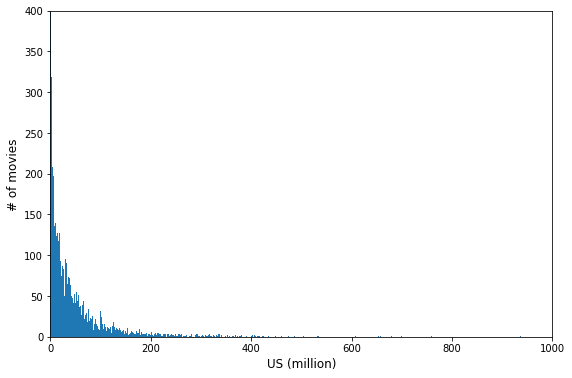

In [4]:
plt.figure(figsize=(9,6))
plt.hist(df1['US (million)'], bins=500);
plt.axis([0, 1000,0,400]);
plt.xlabel('US (million)',size=12);
plt.ylabel('# of movies',size=12);

Text(0, 0.5, 'US Box Office (in Millions)')

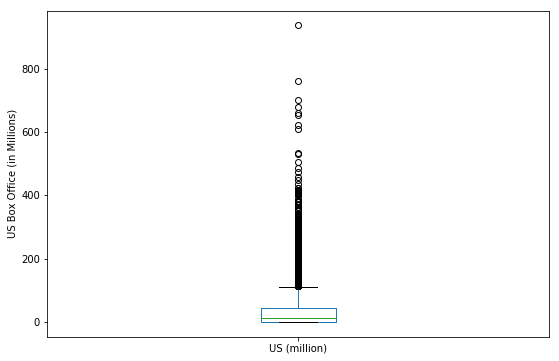

In [5]:
plt.figure(figsize=(9,6));
df1['US (million)'].plot('box');
plt.ylabel('US Box Office (in Millions)')

In [7]:
q_lower=df1['US (million)'].describe().loc['25%']
q_upper=df1['US (million)'].describe().loc['75%']
iqr = q_upper - q_lower

top_boundary = q_upper+(iqr*3)
top_boundary

178.8047585

In [8]:
df1.loc[:,'release year':'international (million)']=df1.loc[:,'release year':'international (million)'].fillna(0)
df1=df1.sort_values(by='US (million)',ascending=True)

df1.info()

C:\Users\LZJ1995\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5834 entries, 4242 to 5211
Data columns (total 41 columns):
movie                      5834 non-null object
release year               5834 non-null float64
release month              5834 non-null float64
USA                        5834 non-null int64
UK                         5834 non-null int64
Germany                    5834 non-null int64
France                     5834 non-null int64
other countries            5834 non-null int64
English                    5834 non-null int64
French                     5834 non-null int64
Spanish                    5834 non-null int64
German                     5834 non-null int64
other languages            5834 non-null int64
Action                     5834 non-null int64
Drama                      5834 non-null int64
Crime                      5834 non-null int64
Comedy                     5834 non-null int64
Adventure                  5834 non-null int64
other categories           5834 non-nul

In [9]:
df2=df1.reset_index().drop(columns='index')
df3=df2.reset_index().rename(columns={'index':'ID'})
df3.head()

,ID,movie,release year,release month,USA,UK,Germany,France,other countries,English,...,director match #,director average,director movie #,writer match #,writers average,writer movie #,budget (million),Opening US (million),US (million),international (million)
0,0,Playback,2012.0,3.0,1,0,0,0,0,1,...,0,0.0,0,0,0.0,0,1.600000,0.000252,0.000252,0.0
1,1,Trojan War,1997.0,10.0,1,0,0,0,0,1,...,0,0.0,0,0,0.0,0,15.000000,0.000217,0.000309,0.0
2,2,Death of a Superhero,2012.0,8.0,0,0,1,0,0,1,...,0,0.0,0,0,0.0,0,4.766720,0.000345,0.000345,0.0
3,3,Evil Cult,2003.0,11.0,1,0,0,0,0,1,...,0,0.0,0,0,0.0,0,0.015000,0.000270,0.000375,0.0
4,4,The Decoy Bride,2012.0,3.0,0,1,0,0,0,1,...,0,0.0,0,0,0.0,0,3.944912,0.000542,0.000542,0.0


In [10]:
US_Movie=df3[['ID','movie','US (million)']]
US_Movie.head()

,ID,movie,US (million)
0,0,Playback,0.000252
1,1,Trojan War,0.000309
2,2,Death of a Superhero,0.000345
3,3,Evil Cult,0.000375
4,4,The Decoy Bride,0.000542


In [11]:
US_M=df3.drop(columns=['movie','release year','international (million)'])
US_M.head()

,ID,release month,USA,UK,Germany,France,other countries,English,French,Spanish,...,actor max,director match #,director average,director movie #,writer match #,writers average,writer movie #,budget (million),Opening US (million),US (million)
0,0,3.0,1,0,0,0,0,1,0,0,...,0.0,0,0.0,0,0,0.0,0,1.600000,0.000252,0.000252
1,1,10.0,1,0,0,0,0,1,0,1,...,0.0,0,0.0,0,0,0.0,0,15.000000,0.000217,0.000309
2,2,8.0,0,0,1,0,0,1,0,0,...,167.6,0,0.0,0,0,0.0,0,4.766720,0.000345,0.000345
3,3,11.0,1,0,0,0,0,1,0,0,...,0.0,0,0.0,0,0,0.0,0,0.015000,0.000270,0.000375
4,4,3.0,0,1,0,0,0,1,0,0,...,0.0,0,0.0,0,0,0.0,0,3.944912,0.000542,0.000542


In [12]:
US_M=pd.get_dummies(US_M)
US_M.head()

,ID,release month,USA,UK,Germany,France,other countries,English,French,Spanish,...,writer movie #,budget (million),Opening US (million),US (million),rated_G,rated_NC-17,rated_Not Rated,rated_PG,rated_PG-13,rated_R
0,0,3.0,1,0,0,0,0,1,0,0,...,0,1.600000,0.000252,0.000252,0,0,0,0,0,1
1,1,10.0,1,0,0,0,0,1,0,1,...,0,15.000000,0.000217,0.000309,0,0,0,0,1,0
2,2,8.0,0,0,1,0,0,1,0,0,...,0,4.766720,0.000345,0.000345,0,0,1,0,0,0
3,3,11.0,1,0,0,0,0,1,0,0,...,0,0.015000,0.000270,0.000375,0,0,1,0,0,0
4,4,3.0,0,1,0,0,0,1,0,0,...,0,3.944912,0.000542,0.000542,0,0,0,1,0,0


In [13]:
US_M.columns

Index(['ID', 'release month', 'USA', 'UK', 'Germany', 'France',
       'other countries', 'English', 'French', 'Spanish', 'German',
       'other languages', 'Action', 'Drama', 'Crime', 'Comedy', 'Adventure',
       'other categories', 'runtime', 'IMDB rating', 'Metacritic rating',
       'votes number', 'reviews number', 'critics number', 'actor match #',
       'actor average', 'actor movie #', 'actor min', 'actor max',
       'director match #', 'director average', 'director movie #',
       'writer match #', 'writers average', 'writer movie #',
       'budget (million)', 'Opening US (million)', 'US (million)', 'rated_G',
       'rated_NC-17', 'rated_Not Rated', 'rated_PG', 'rated_PG-13', 'rated_R'],
      dtype='object')

US_M = US_M[['release month','USA', 'UK', 'Germany', 'France', 'other countries', 'English', 'French','Spanish', 'German',\
             'other languages','Action', 'Drama','Crime', 'Comedy', 'Adventure','other categories',\
               'runtime','rated_G', 'rated_NC-17', 'rated_PG','rated_PG-13', 'rated_R', 'rated_Not Rated','IMDB rating',\
             'Metacritic rating', 'votes number','reviews number','critics number','director match #', 'director average',\
             'director movie #', 'writer match #', 'writers average','writer movie #', 'budget (million)', 'Opening US (million)','US (million)']]


In [14]:
US_M['release month']=US_M['release month'].astype(int)
US_M['Metacritic rating']=US_M['Metacritic rating'].astype(int)

In [15]:
US_M_LR=US_M[US_M['US (million)']<=178.8047585]

In [16]:
US_M_Log=US_M.copy()

In [17]:
US_M_Log['US (million)']=np.log10(US_M_Log['US (million)'])
US_M_Log.head()

,ID,release month,USA,UK,Germany,France,other countries,English,French,Spanish,...,writer movie #,budget (million),Opening US (million),US (million),rated_G,rated_NC-17,rated_Not Rated,rated_PG,rated_PG-13,rated_R
0,0,3,1,0,0,0,0,1,0,0,...,0,1.600000,0.000252,-3.598599,0,0,0,0,0,1
1,1,10,1,0,0,0,0,1,0,1,...,0,15.000000,0.000217,-3.510042,0,0,0,0,1,0
2,2,8,0,0,1,0,0,1,0,0,...,0,4.766720,0.000345,-3.462181,0,0,1,0,0,0
3,3,11,1,0,0,0,0,1,0,0,...,0,0.015000,0.000270,-3.425969,0,0,1,0,0,0
4,4,3,0,1,0,0,0,1,0,0,...,0,3.944912,0.000542,-3.266001,0,0,0,1,0,0


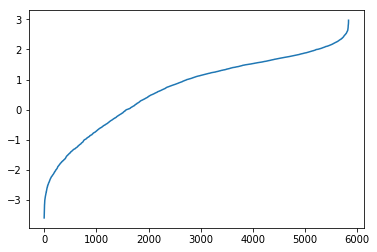

In [18]:
plt.plot(US_M_Log['US (million)'])

In [19]:
US_M_Log.iloc[[1]]

,ID,release month,USA,UK,Germany,France,other countries,English,French,Spanish,...,writer movie #,budget (million),Opening US (million),US (million),rated_G,rated_NC-17,rated_Not Rated,rated_PG,rated_PG-13,rated_R
1,1,10,1,0,0,0,0,1,0,1,...,0,15.0,0.000217,-3.510042,0,0,0,0,1,0


## Build US model

### Linear Regression

In [177]:
X=US_M_Log.drop(columns=['ID','Opening US (million)','US (million)'])
y=US_M_Log['US (million)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = preprocessing.MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

C:\Users\LZJ1995\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.91666667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.25      , 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.75      , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.75      , 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [178]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train, y_train)


cross_val_score_mean_sqr_err  = cross_val_score(lr, X_train, y_train, scoring ='neg_mean_squared_error', cv=15) 
print(cross_val_score_mean_sqr_err)

y_pred=lr.predict(X_test)
y_pred

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

[-0.75116666 -0.76778976 -0.72944836 -0.64288191 -0.65758694 -0.65723712
 -0.63107105 -0.75966301 -0.67229598 -2.84357568 -0.72230358 -0.63785458
 -0.70449867 -0.63718394 -0.67064868]
0.761463573190081
0.5530515062415226


In [193]:
lrcompare=pd.DataFrame({'Predicted (million)':10**(y_pred),'Actual (million)':10**(y_test)}).reset_index().rename(columns={'index':'ID'})
lrcompare.head()

,ID,Predicted (million),Actual (million)
0,2550,3.496116,7.362100
1,5445,74.936416,132.092958
2,5518,19.456405,148.768917
3,1554,0.093734,0.925756
4,2600,1.665531,7.994115


In [199]:
LR_df=pd.merge(US_Movie,lrcompare,on='ID',how='right').drop(columns='US (million)')
LR_df['Error (%)']=abs((LR_df['Actual (million)']-LR_df['Predicted (million)'])/LR_df['Actual (million)']*100)
LR_df.head(10)

,ID,movie,Predicted (million),Actual (million),Error (%)
0,8,La prochaine fois je viserai le coeur,0.025403,0.000714,3457.884952
1,12,Strangers Online,0.346141,0.000968,35658.402564
2,14,Eastside,0.357998,0.001003,35592.698939
3,15,Daddy's Home,0.080505,0.001012,7855.085892
4,17,Flypaper,1.927793,0.001098,175473.112275
5,23,Exorcism,0.990624,0.001303,75926.432311
6,29,Terror Firmer,1.193562,0.001434,83133.088297
7,30,Eddie,0.084303,0.001521,5442.605734
8,33,Mr. Smith Gets a Hustler,0.445246,0.001583,28026.745573
9,37,The Samaritan,0.604428,0.001744,34557.551634


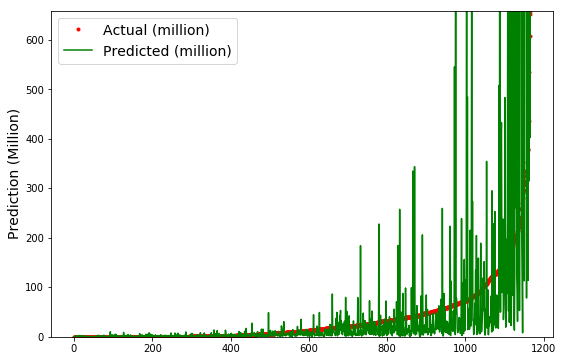

In [207]:
plt.figure(figsize=(9,6));
plt.plot(LR_df['Actual (million)'],'.',c = 'red', label = "Actual");
plt.plot(LR_df['Predicted (million)'], c = 'green', label = "Prediction");
plt.legend(["Actual (million)", "Predicted (million)"],fontsize = 14);
plt.ylabel('Prediction (Million)', fontsize = 14);
plt.ylim(0,max(LR_df['Actual (million)']));

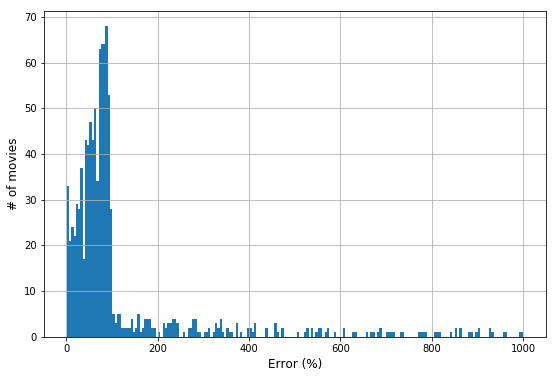

In [202]:
plt.figure(figsize=(9,6));
LR_df['Error (%)'].hist(range=(1,1000),bins=200);
plt.xlabel('Error (%)',size=12);
plt.ylabel('# of movies',size=12);

In [203]:
print(lr.coef_)
print(lr.intercept_)

[-9.49250368e-03  5.67256353e-01 -1.64487360e-01  2.03809745e-02
 -5.74800945e-02  7.76724725e-02  1.25925148e-01  6.66707896e-02
  6.45791655e-02  3.22049847e-02  3.03832028e-01  5.77735061e-02
 -1.52660657e-01  1.01474830e-01  1.80659549e-01 -5.77906221e-02
  9.25973911e-02  4.68832099e-04  6.83371942e-02  2.02422788e-03
  5.16864130e-08  4.23906633e-04  1.90158470e-03  1.18704201e-01
 -1.97623035e-03  1.13361253e-03  2.38581962e-03  1.42652489e-03
  4.16833201e-01 -2.15251352e-03 -6.11725138e-03  4.27322276e-01
 -2.36851072e-03 -9.81276530e-03  6.32302660e-03 -5.69316547e-01
 -1.29546033e+00 -2.03906771e+00 -7.37625331e-01 -9.63630239e-01
 -1.36331350e+00]
0.0


In [204]:
pd.DataFrame(list(zip(X.columns, lr.coef_)),columns=['features','coefficient']).sort_values(by='coefficient',ascending=False).head()

,features,coefficient
1,USA,0.567256
31,writer match #,0.427322
28,director match #,0.416833
10,other languages,0.303832
14,Comedy,0.180660


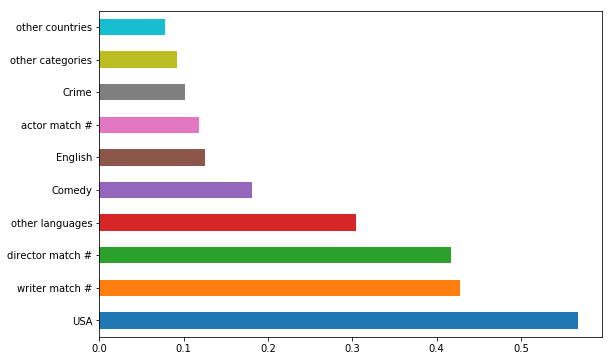

In [205]:
pd.Series(data=lr.coef_, index=X.columns).nlargest(10).plot(kind='barh',figsize=(9,6));

### Ridge Regression

In [217]:
r = Ridge(normalize=True)
r.fit(X_train, y_train)


y_pred=r.predict(X_test)
y_pred

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.8422800458348293
0.5056154869870246


In [218]:
Ridgecompare=pd.DataFrame({'Predicted (million)':10**(y_pred),'Actual (million)':10**(y_test)}).reset_index().rename(columns={'index':'ID'})
Ridgecompare.head()

,ID,Predicted (million),Actual (million)
0,2550,3.675075,7.362100
1,5445,60.524413,132.092958
2,5518,40.226416,148.768917
3,1554,0.376669,0.925756
4,2600,2.081548,7.994115


In [219]:
Ridge_df=pd.merge(US_Movie,Ridgecompare,on='ID',how='right')
Ridge_df['Error (%)']=abs(((Ridge_df['Actual (million)']-Ridge_df['Predicted (million)'])/Ridge_df['Actual (million)'])*100)
Ridge_df.sort_values(by='Error (%)',ascending=True).head()

,ID,movie,US (million),Predicted (million),Actual (million),Error (%)
1054,5300,Watchmen,107.509799,107.333892,107.509799,0.163619
261,1212,Chico & Rita,0.350524,0.351137,0.350524,0.174946
335,1599,Another Day in Paradise,1.025234,1.027454,1.025234,0.216532
559,2721,Duplex,9.692135,9.735278,9.692135,0.445137
866,4267,Valerian and the City of a Thousand Planets,41.189488,40.885397,41.189488,0.738273


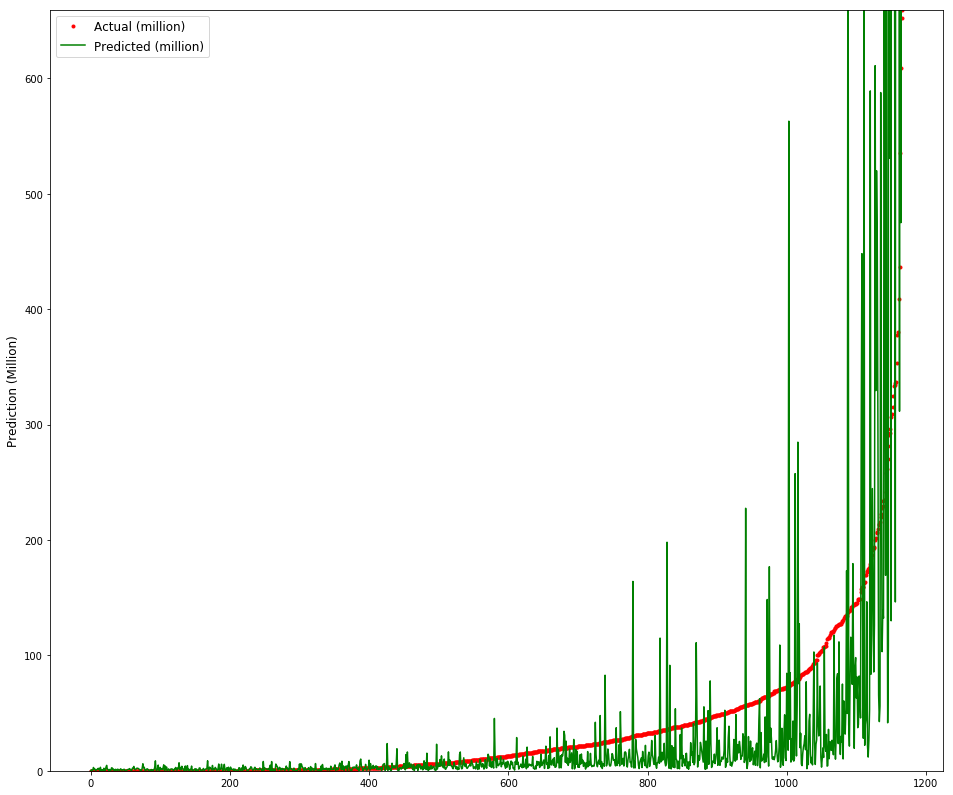

In [220]:
plt.figure(figsize=(16,14));
plt.plot(Ridge_df['Actual (million)'],'.', c = 'red', label = "Actual");
plt.plot(Ridge_df['Predicted (million)'], c = 'green', label = "Prediction");
plt.legend(["Actual (million)", "Predicted (million)"],fontsize = 12)
plt.ylabel('Prediction (Million)', fontsize = 12);
plt.ylim(0,max(Ridge_df['Actual (million)']));

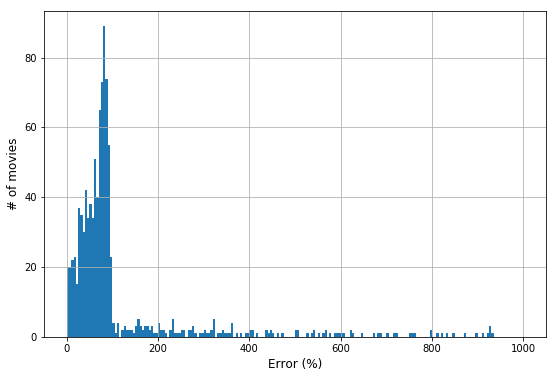

In [221]:
plt.figure(figsize=(9,6))
Ridge_df['Error (%)'].hist(range=(0,1000),bins=200);
plt.xlabel('Error (%)',size=12);
plt.ylabel('# of movies',size=12);

### Poly Regression

In [20]:
X=US_M_Log.drop(columns=['ID','Opening US (million)','US (million)'])
y=US_M_Log['US (million)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = preprocessing.MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

C:\Users\LZJ1995\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.91666667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.25      , 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.75      , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.75      , 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [21]:
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


PR = LinearRegression()
PR.fit(X_train_poly, y_train)

y_pred=PR.predict(X_test_poly)

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.6978375303990282
0.5903974345176932


In [22]:
PRcompare=pd.DataFrame({'Predicted (million)':10**(y_pred),'Actual (million)':10**(y_test)}).reset_index().rename(columns={'index':'ID'})
PRcompare.tail()

,ID,Predicted (million),Actual (million)
1162,2177,3.862662,3.950294
1163,4885,8.647031,67.823573
1164,3013,0.608395,13.876974
1165,1173,0.429462,0.317594
1166,5176,32.911710,93.432655


In [23]:
PRcompare1=pd.DataFrame({'Predicted (log)':y_pred,'Actual (log)':y_test}).sort_values(by='Actual (log)',ascending=True).reset_index().rename(columns={'index':'ID'})
PRcompare1.tail()

,ID,Predicted (log),Actual (log)
1162,5818,1.852976,2.639955
1163,5825,0.939262,2.728239
1164,5826,1.945390,2.784319
1165,5828,5.182329,2.814428
1166,5829,2.863684,2.819100


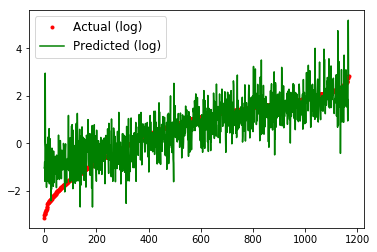

In [26]:
plt.plot(PRcompare1['Actual (log)'], '.',c = 'red', label = "Actual");
plt.plot(PRcompare1['Predicted (log)'], c = 'green', label = "Prediction");
plt.legend(["Actual (log)", "Predicted (log)"],fontsize = 12);

In [27]:
len(PRcompare)

1167

In [28]:
PR_df=pd.merge(US_Movie,PRcompare,on='ID',how='right')
PR_df['Error (%)']=abs(((PR_df['Actual (million)']-PR_df['Predicted (million)'])/PR_df['Actual (million)'])*100)
PR_df.sort_values(by='Error (%)',ascending=True).head()

,ID,movie,US (million),Predicted (million),Actual (million),Error (%)
890,4378,The Man from U.N.C.L.E.,45.445109,45.554732,45.445109,0.241221
387,1867,I Love You Phillip Morris,2.035566,2.040593,2.035566,0.246948
159,730,The Nile Hilton Incident,0.081089,0.081570,0.081089,0.593646
297,1419,Fiza,0.623791,0.628545,0.623791,0.762157
412,1973,Pieces of April,2.528664,2.548939,2.528664,0.801804


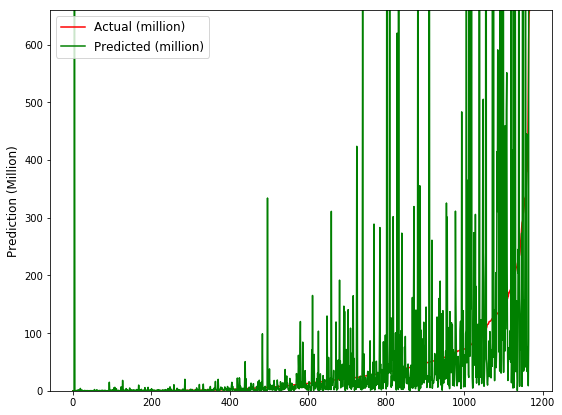

In [29]:
plt.figure(figsize=(9,7));
plt.plot(PR_df['Actual (million)'], c = 'red', label = "Actual");
plt.plot(PR_df['Predicted (million)'], c = 'green', label = "Prediction");
plt.legend(["Actual (million)", "Predicted (million)"],fontsize = 12)
plt.ylabel('Prediction (Million)', fontsize = 12);
plt.ylim(0,max(PR_df['Actual (million)']));

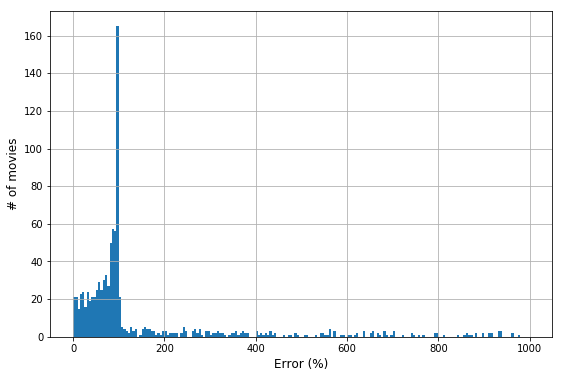

In [255]:
plt.figure(figsize=(9,6))
PR_df['Error (%)'].hist(range=(0,1000),bins=200);
plt.xlabel('Error (%)',size=12);
plt.ylabel('# of movies',size=12);

### Gradient Boost Regressor

In [112]:
X=US_M_Log.drop(columns=['ID','Opening US (million)','US (million)'])
y=US_M_Log['US (million)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = preprocessing.MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

GB = GradientBoostingRegressor(learning_rate=0.1, max_depth=30,random_state=20)
GB.fit(X_train, y_train)


y_pred=GB.predict(X_test)
y_pred

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
print(GB.score(X_test,y_test))

C:\Users\LZJ1995\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8278167643997525
0.5141048515210768
0.5141048515210768


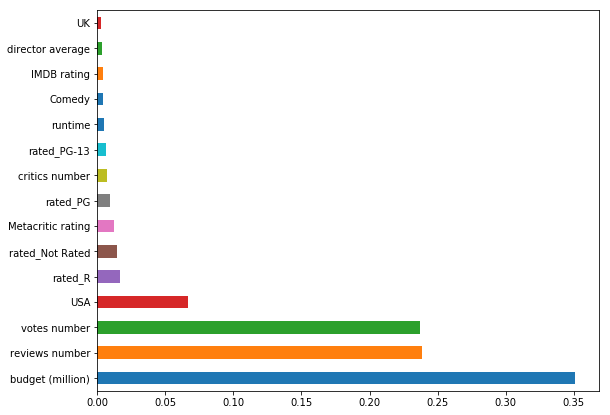

In [97]:
pd.Series(GB.feature_importances_, index=X.columns).nlargest(15).plot(kind='barh',figsize=(9,7));

In [98]:
GBcompare=pd.DataFrame({'Actual (million)':10**(y_test),'Predicted (million)':10**(y_pred)}).reset_index().rename(columns={'index':'ID'})
GBcompare.head()

,ID,Actual (million),Predicted (million)
0,2550,7.362100,5.661647
1,5445,132.092958,76.122935
2,5518,148.768917,87.001360
3,1554,0.925756,0.125105
4,2600,7.994115,7.663941


In [99]:
GBcompare1=pd.DataFrame({'Predicted (log)':y_pred,'Actual (log)':y_test}).sort_values(by='Actual (log)',ascending=True).reset_index().rename(columns={'index':'ID'})
GBcompare1.tail()

,ID,Predicted (log),Actual (log)
1162,5818,2.422508,2.639955
1163,5825,2.436952,2.728239
1164,5826,2.254958,2.784319
1165,5828,2.483914,2.814428
1166,5829,2.376563,2.819100


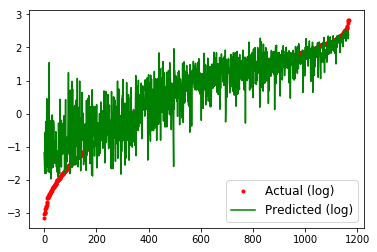

In [100]:
plt.plot(GBcompare1['Actual (log)'], '.',c = 'red', label = "Actual");
plt.plot(GBcompare1['Predicted (log)'], c = 'green', label = "Prediction");
plt.legend(["Actual (log)", "Predicted (log)"],fontsize = 12);

In [101]:
GB_df=pd.merge(US_Movie,GBcompare,on='ID',how='right')
GB_df['Error (%)']=abs(((GB_df['Actual (million)']-GB_df['Predicted (million)'])/GB_df['Actual (million)'])*100)
GB_df.sort_values(by='Error (%)',ascending=False).head()

,ID,movie,US (million),Actual (million),Predicted (million),Error (%)
19,84,Mr. Nobody,0.003600,0.003600,34.632496,961913.780320
10,44,ATM,0.002034,0.002034,2.831085,139088.075852
14,69,Nothing But the Truth,0.003045,0.003045,2.656212,87131.929156
93,416,The Boondock Saints,0.025812,0.025812,17.347806,67108.298383
6,29,Terror Firmer,0.001434,0.001434,0.576160,40078.531404


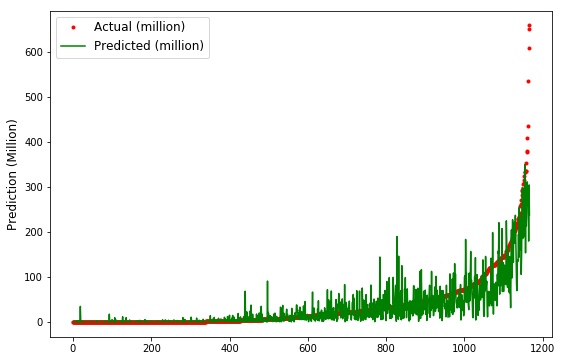

In [102]:
plt.figure(figsize=(9,6));
plt.plot(GB_df['Actual (million)'],'.', c = 'red', label = "Actual");
plt.plot(GB_df['Predicted (million)'], c = 'green', label = "Prediction");
plt.legend(["Actual (million)", "Predicted (million)"],fontsize = 12)
plt.ylabel('Prediction (Million)', fontsize = 12);

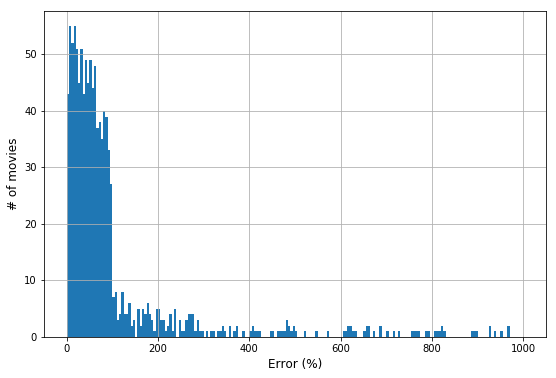

In [103]:
plt.figure(figsize=(9,6))
RF_df['Error (%)'].hist(range=(0,1000),bins=200);
plt.xlabel('Error (%)',size=12);
plt.ylabel('# of movies',size=12);

### Decision Tree Regressor

In [30]:
X=US_M_Log.drop(columns=['ID','Opening US (million)','US (million)'])
y=US_M_Log['US (million)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = preprocessing.MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

C:\Users\LZJ1995\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.91666667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.25      , 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.75      , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.75      , 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [42]:
DT = DecisionTreeRegressor(max_depth=100,max_features=5, random_state=20)
DT.fit(X_train, y_train)


y_pred=DT.predict(X_test)
y_pred


print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
print(DT.score(X_test,y_test))

0.9471727878462763
0.44404766588718325
0.44404766588718325


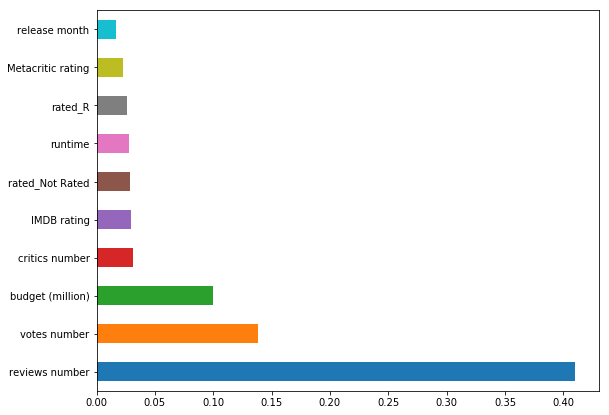

In [43]:
(pd.Series(DT.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh',figsize=(9,7)))     

In [44]:
DTcompare=pd.DataFrame({'Predicted (million)':10**(y_pred),'Actual (million)':10**(y_test)}).reset_index().rename(columns={'index':'ID'})
DTcompare.head()

,ID,Predicted (million),Actual (million)
0,2550,1.978592,7.362100
1,5445,150.117807,132.092958
2,5518,109.449237,148.768917
3,1554,0.001097,0.925756
4,2600,15.024049,7.994115


In [45]:
DTcompare1=pd.DataFrame({'Predicted (log)':y_pred,'Actual (log)':y_test}).sort_values(by='Actual (log)',ascending=True).reset_index().rename(columns={'index':'ID'})
DTcompare1.tail()

,ID,Predicted (log),Actual (log)
1162,5818,2.279710,2.639955
1163,5825,2.651413,2.728239
1164,5826,2.566301,2.784319
1165,5828,2.726056,2.814428
1166,5829,2.651413,2.819100


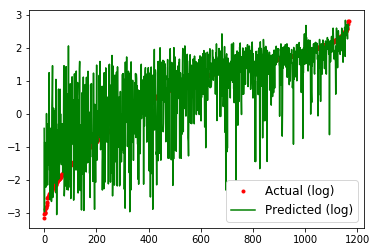

In [46]:
plt.plot(DTcompare1['Actual (log)'], '.',c = 'red', label = "Actual");
plt.plot(DTcompare1['Predicted (log)'], c = 'green', label = "Prediction");
plt.legend(["Actual (log)", "Predicted (log)"],fontsize = 12);

In [47]:
DT_df=pd.merge(US_Movie,DTcompare,on='ID',how='right')
DT_df['Error (%)']=abs((DT_df['Actual (million)']-DT_df['Predicted (million)'])/DT_df['Actual (million)']*100)
DT_df.sort_values(by='Error (%)',ascending=False).head()

,ID,movie,US (million),Predicted (million),Actual (million),Error (%)
32,132,Kid Cannabis,0.005565,29.392418,0.005565,528065.642408
19,84,Mr. Nobody,0.003600,18.095701,0.003600,502558.361111
93,416,The Boondock Saints,0.025812,116.724075,0.025812,452108.565783
76,324,Violet & Daisy,0.017186,29.392418,0.017186,170925.357849
45,183,Largo Winch,0.007621,11.300653,0.007621,148183.073088


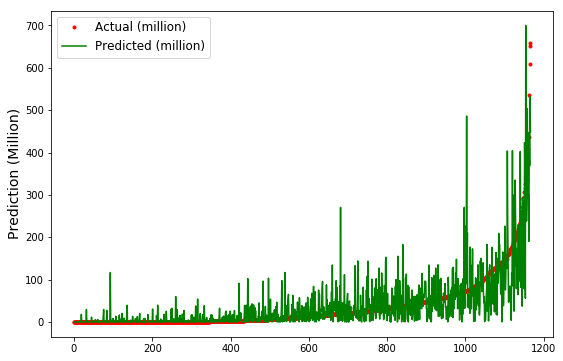

In [48]:
plt.figure(figsize=(9,6));
plt.plot(DT_df['Actual (million)'],'.', c = 'red', label = "Actual");
plt.plot(DT_df['Predicted (million)'], c = 'green', label = "Prediction");
plt.legend(["Actual (million)", "Predicted (million)"],fontsize = 12)
plt.ylabel('Prediction (Million)', fontsize = 14);

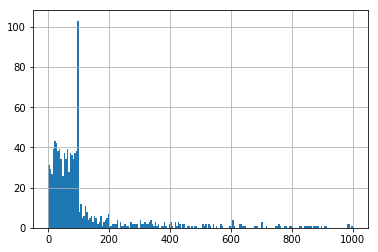

In [49]:
DT_df['Error (%)'].hist(range=(0,1000),bins=200);

### Random Forest Regressor

In [59]:
X=US_M_Log.drop(columns=['ID','Opening US (million)','US (million)'])
y=US_M_Log['US (million)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = preprocessing.MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

RF = RandomForestRegressor(n_estimators=4000,max_depth=200,random_state=42)
RF.fit(X_train, y_train)


y_pred=RF.predict(X_test)
y_pred

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
print(RF.score(X_test,y_test))

C:\Users\LZJ1995\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.4395981554350192
0.7419735620345413
0.7419735620345413


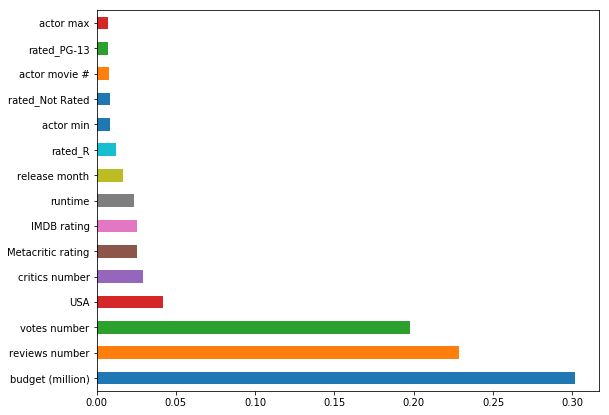

In [60]:
pd.Series(RF.feature_importances_, index=X.columns).nlargest(15).plot(kind='barh',figsize=(9,7));

In [61]:
RFcompare=pd.DataFrame({'Actual (million)':10**(y_test),'Predicted (million)':10**(y_pred)}).reset_index().rename(columns={'index':'ID'})
RFcompare.head()

,ID,Actual (million),Predicted (million)
0,2550,7.362100,3.977843
1,5445,132.092958,77.535681
2,5518,148.768917,93.388728
3,1554,0.925756,0.343571
4,2600,7.994115,11.512926


In [62]:
RFcompare1=pd.DataFrame({'Predicted (log)':y_pred,'Actual (log)':y_test}).sort_values(by='Actual (log)',ascending=True).reset_index().rename(columns={'index':'ID'})
RFcompare1.tail()

,ID,Predicted (log),Actual (log)
1162,5818,2.414145,2.639955
1163,5825,2.402582,2.728239
1164,5826,2.279032,2.784319
1165,5828,2.591909,2.814428
1166,5829,2.451753,2.819100


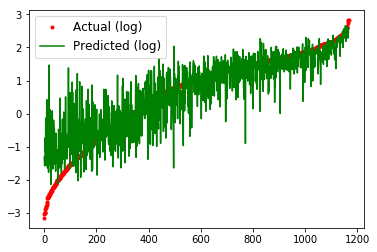

In [63]:
plt.plot(RFcompare1['Actual (log)'], '.',c = 'red', label = "Actual");
plt.plot(RFcompare1['Predicted (log)'], c = 'green', label = "Prediction");
plt.legend(["Actual (log)", "Predicted (log)"],fontsize = 12);

In [64]:
RF_df=pd.merge(US_Movie,RFcompare,on='ID',how='right')
RF_df['Error (%)']=abs(((RF_df['Actual (million)']-RF_df['Predicted (million)'])/RF_df['Actual (million)'])*100)
RF_df.sort_values(by='Error (%)',ascending=False).head()

,ID,movie,US (million),Actual (million),Predicted (million),Error (%)
19,84,Mr. Nobody,0.003600,0.003600,29.381795,816060.976526
10,44,ATM,0.002034,0.002034,2.660442,130698.540639
93,416,The Boondock Saints,0.025812,0.025812,24.003464,92893.430920
14,69,Nothing But the Truth,0.003045,0.003045,1.926125,63155.330855
6,29,Terror Firmer,0.001434,0.001434,0.735369,51180.988345


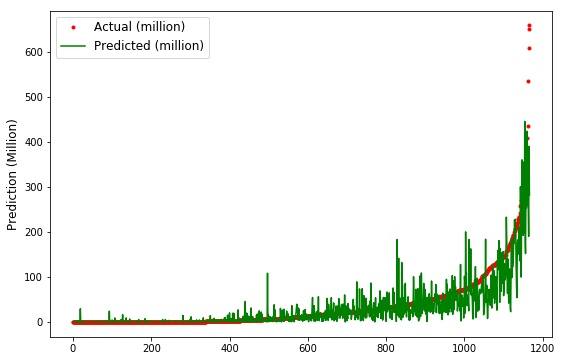

In [65]:
plt.figure(figsize=(9,6));
plt.plot(RF_df['Actual (million)'],'.', c = 'red', label = "Actual");
plt.plot(RF_df['Predicted (million)'], c = 'green', label = "Prediction");
plt.legend(["Actual (million)", "Predicted (million)"],fontsize = 12)
plt.ylabel('Prediction (Million)', fontsize = 12);

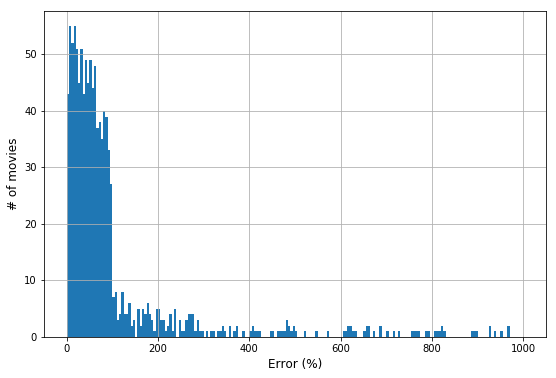

In [66]:
plt.figure(figsize=(9,6))
RF_df['Error (%)'].hist(range=(0,1000),bins=200);
plt.xlabel('Error (%)',size=12);
plt.ylabel('# of movies',size=12);

### KNeighborsRegressor

In [87]:
KNR = KNeighborsRegressor()
KNR.fit(X_train, y_train)


y_pred=KNR.predict(X_test)
y_pred

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
print(KNR.score(X_test,y_test))

0.8414693975521804
0.5060913049271789
0.5060913049271789


In [88]:
KNRcompare=pd.DataFrame({'Actual (million)':10**(y_test),'Predicted (million)':10**(y_pred)}).reset_index().rename(columns={'index':'ID'})
KNRcompare.head()

,ID,Actual (million),Predicted (million)
0,2550,7.362100,23.123128
1,5445,132.092958,173.461450
2,5518,148.768917,55.803969
3,1554,0.925756,0.302610
4,2600,7.994115,24.443302


In [89]:
KNR_df=pd.merge(US_Movie,KNRcompare,on='ID',how='right')
KNR_df['Error (%)']=abs(((KNR_df['Actual (million)']-KNR_df['Predicted (million)'])/KNR_df['Actual (million)'])*100)
KNR_df.sort_values(by='Error (%)',ascending=True).head()

,ID,movie,US (million),Actual (million),Predicted (million),Error (%)
987,4908,Blade,70.087718,70.087718,70.142076,0.077557
434,2121,Disobedience,3.480702,3.480702,3.472337,0.240311
708,3483,The Quest,21.600000,21.600000,21.459763,0.649246
927,4578,Corpse Bride,53.359111,53.359111,54.182211,1.542567
1024,5096,Atlantis: The Lost Empire,84.052762,84.052762,85.426916,1.634871


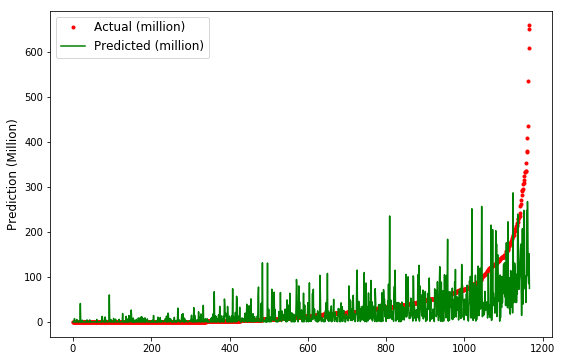

In [90]:
plt.figure(figsize=(9,6));
plt.plot(KNR_df['Actual (million)'],'.', c = 'red', label = "Actual");
plt.plot(KNR_df['Predicted (million)'], c = 'green', label = "Prediction");
plt.legend(["Actual (million)", "Predicted (million)"],fontsize = 12)
plt.ylabel('Prediction (Million)', fontsize = 12);

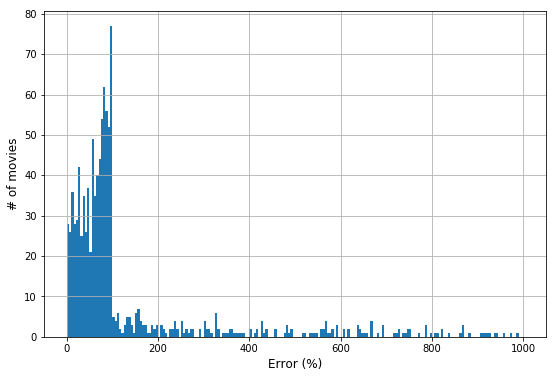

In [91]:
plt.figure(figsize=(9,6))
KNR_df['Error (%)'].hist(range=(0,1000),bins=200);
plt.xlabel('Error (%)',size=12);
plt.ylabel('# of movies',size=12);

### Adaboost Regression

In [92]:
AB =AdaBoostRegressor()
AB.fit(X_train, y_train)

y_pred=AB.predict(X_test)
y_pred

cross_val_score(AB, X_test, y_test, cv=10).mean()

0.6091728378032661

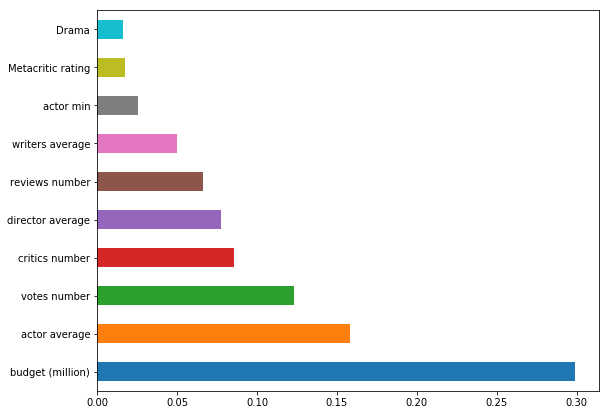

In [67]:
(pd.Series(AB.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh',figsize=(9,7)))     

In [68]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
ABcompare=pd.DataFrame({'Predicted':y_pred,'Actual':y_test}).sort_values(by='Predicted',ascending=True)

3846.602098001836
0.1697442626547787


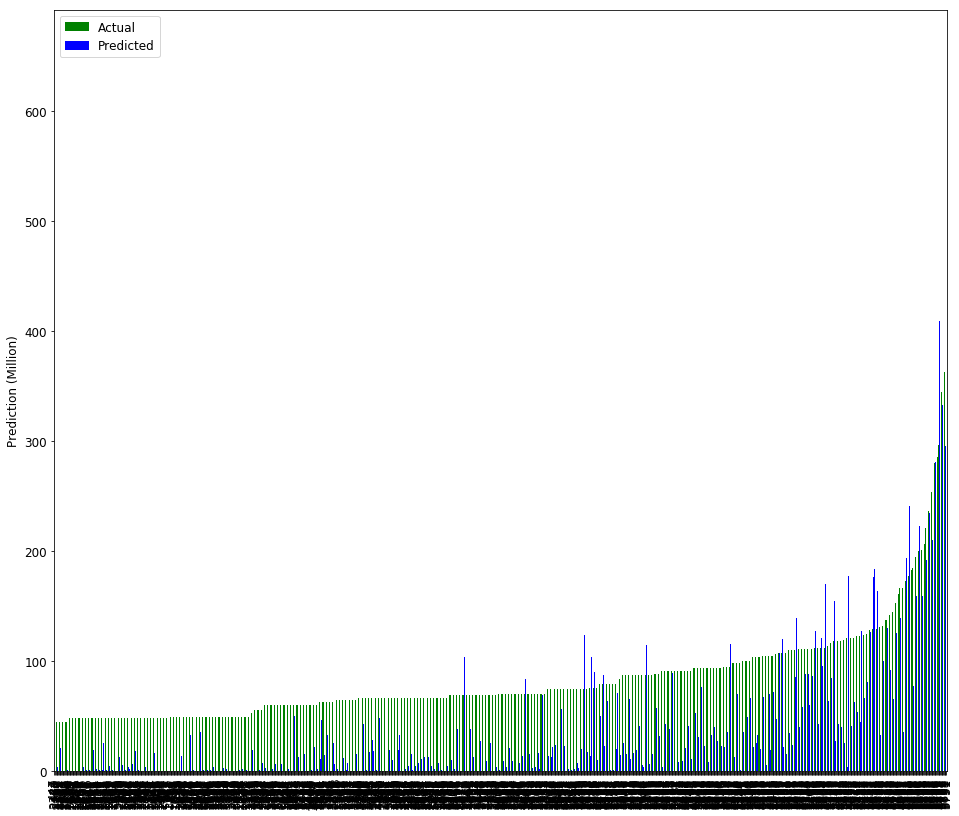

In [69]:
ABcompare.plot(kind = "bar", fontsize = 12, figsize=(16,14),color = ['g','b'], width= 0.7);
plt.legend(["Actual", "Predicted"],fontsize = 12);
plt.ylabel('Prediction (Million)', fontsize = 12);

### SVR

In [76]:
svr = SVR(C=10,degree=500)
svr.fit(X_train, y_train)


y_pred=svr.predict(X_test)
y_pred

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
print(svr.score(X_test,y_test))

C:\Users\LZJ1995\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


5199.2848685260215
-0.1222205942299841
-0.12222059422998409


In [77]:
SVRcompare=pd.DataFrame({'Predicted':y_pred,'Actual':y_test}).reset_index()
SVRcompare.head()

,index,Predicted,Actual
0,2550,13.233329,7.362100
1,5445,13.233329,132.092958
2,5518,13.233329,148.768917
3,1554,13.233329,0.925756
4,2600,13.233329,7.994115


In [78]:
SVR_df=pd.merge(US_Movie,SVRcompare,on='index',how='right').drop(columns='index')
SVR_df['Error (%)']=(RF_df['Actual']-DT_df['Predicted'])/RF_df['Actual']*100
SVR_df.sort_values(by='Error (%)',ascending=True).head()

,movie,Predicted,Actual,Error (%)
866,Malice,13.233329,0.003600,-1.105040e+06
277,Ruby in Paradise,13.233329,0.004106,-3.222397e+05
1123,Toy Story,13.233329,0.025812,-2.243642e+05
791,Dragon: The Bruce Lee Story,13.233329,0.001434,-2.126569e+05
598,Indian Summer,13.051246,0.001303,-2.071141e+05


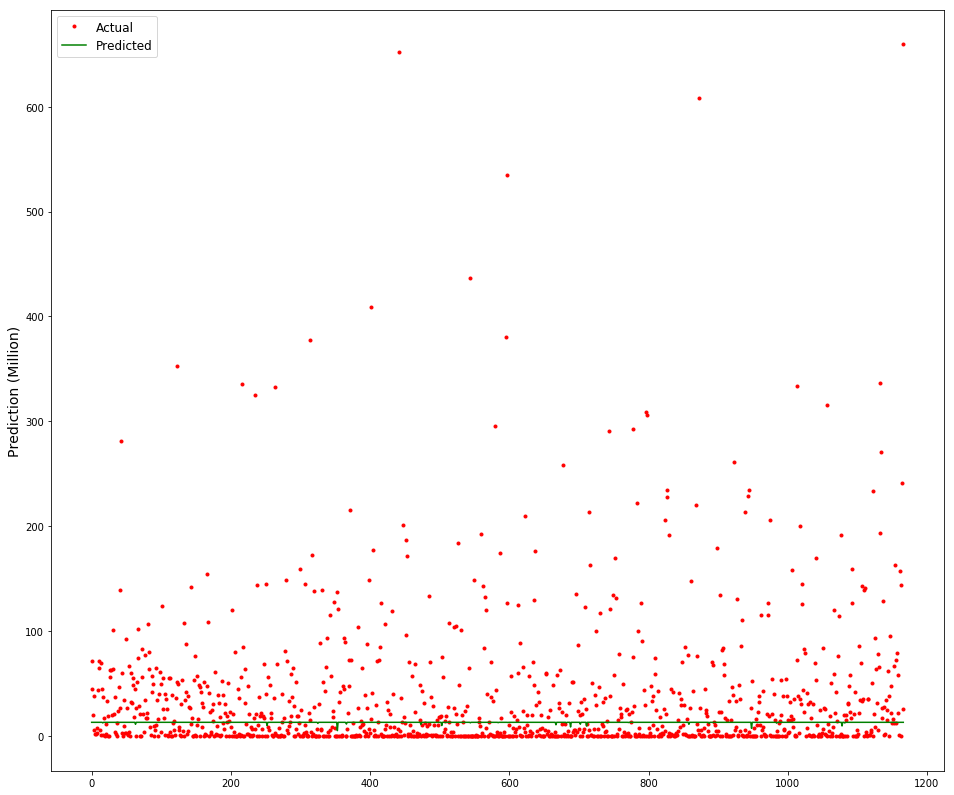

In [79]:
plt.figure(figsize=(16,14));
plt.plot(SVR_df['Actual'],'.', c = 'red', label = "Actual");
plt.plot(SVR_df['Predicted'], c = 'green', label = "Prediction");
plt.legend(["Actual", "Predicted"],fontsize = 12)
plt.ylabel('Prediction (Million)', fontsize = 14);

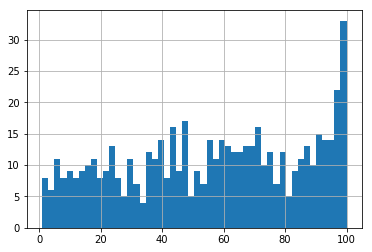

In [80]:
SVR_df['Error (%)'].hist(range=(1,100),bins=50);

In [75]:
def plot_corr(df,size=50):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
corr = df_f.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

NameError: name 'df_f' is not defined

In [ ]:
plt.matshow(df_f.corr())
plt.show()